In [2]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
path = '../data/graphs/kw33/results'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        df_tmp['Clustering'] = suffix[1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    return df

df = build_df_from_csvs(path)
df.head()

Checkpoint  bootstrap_jsd  gambette  cluster_number      ijsd       ari  \
0          10       0.000000  0.994230               1  0.974538  1.000000   
1          20       0.000000  0.978541               1  0.974538  1.000000   
2          30       0.013543  0.976104               3  0.792277  0.000000   
3          40       0.015185  0.956944               2  0.931105 -0.061798   
4          50       0.025176  0.951358               3  0.845357 -0.034217   

     n  k  log            Sampling Clustering  
0  100  3  0.3  modifiedrandomwalk         cw  
1  100  3  0.3  modifiedrandomwalk         cw  
2  100  3  0.3  modifiedrandomwalk         cw  
3  100  3  0.3  modifiedrandomwalk         cw  
4  100  3  0.3  modifiedrandomwalk         cw

In [6]:
sns.set_theme(style="darkgrid")

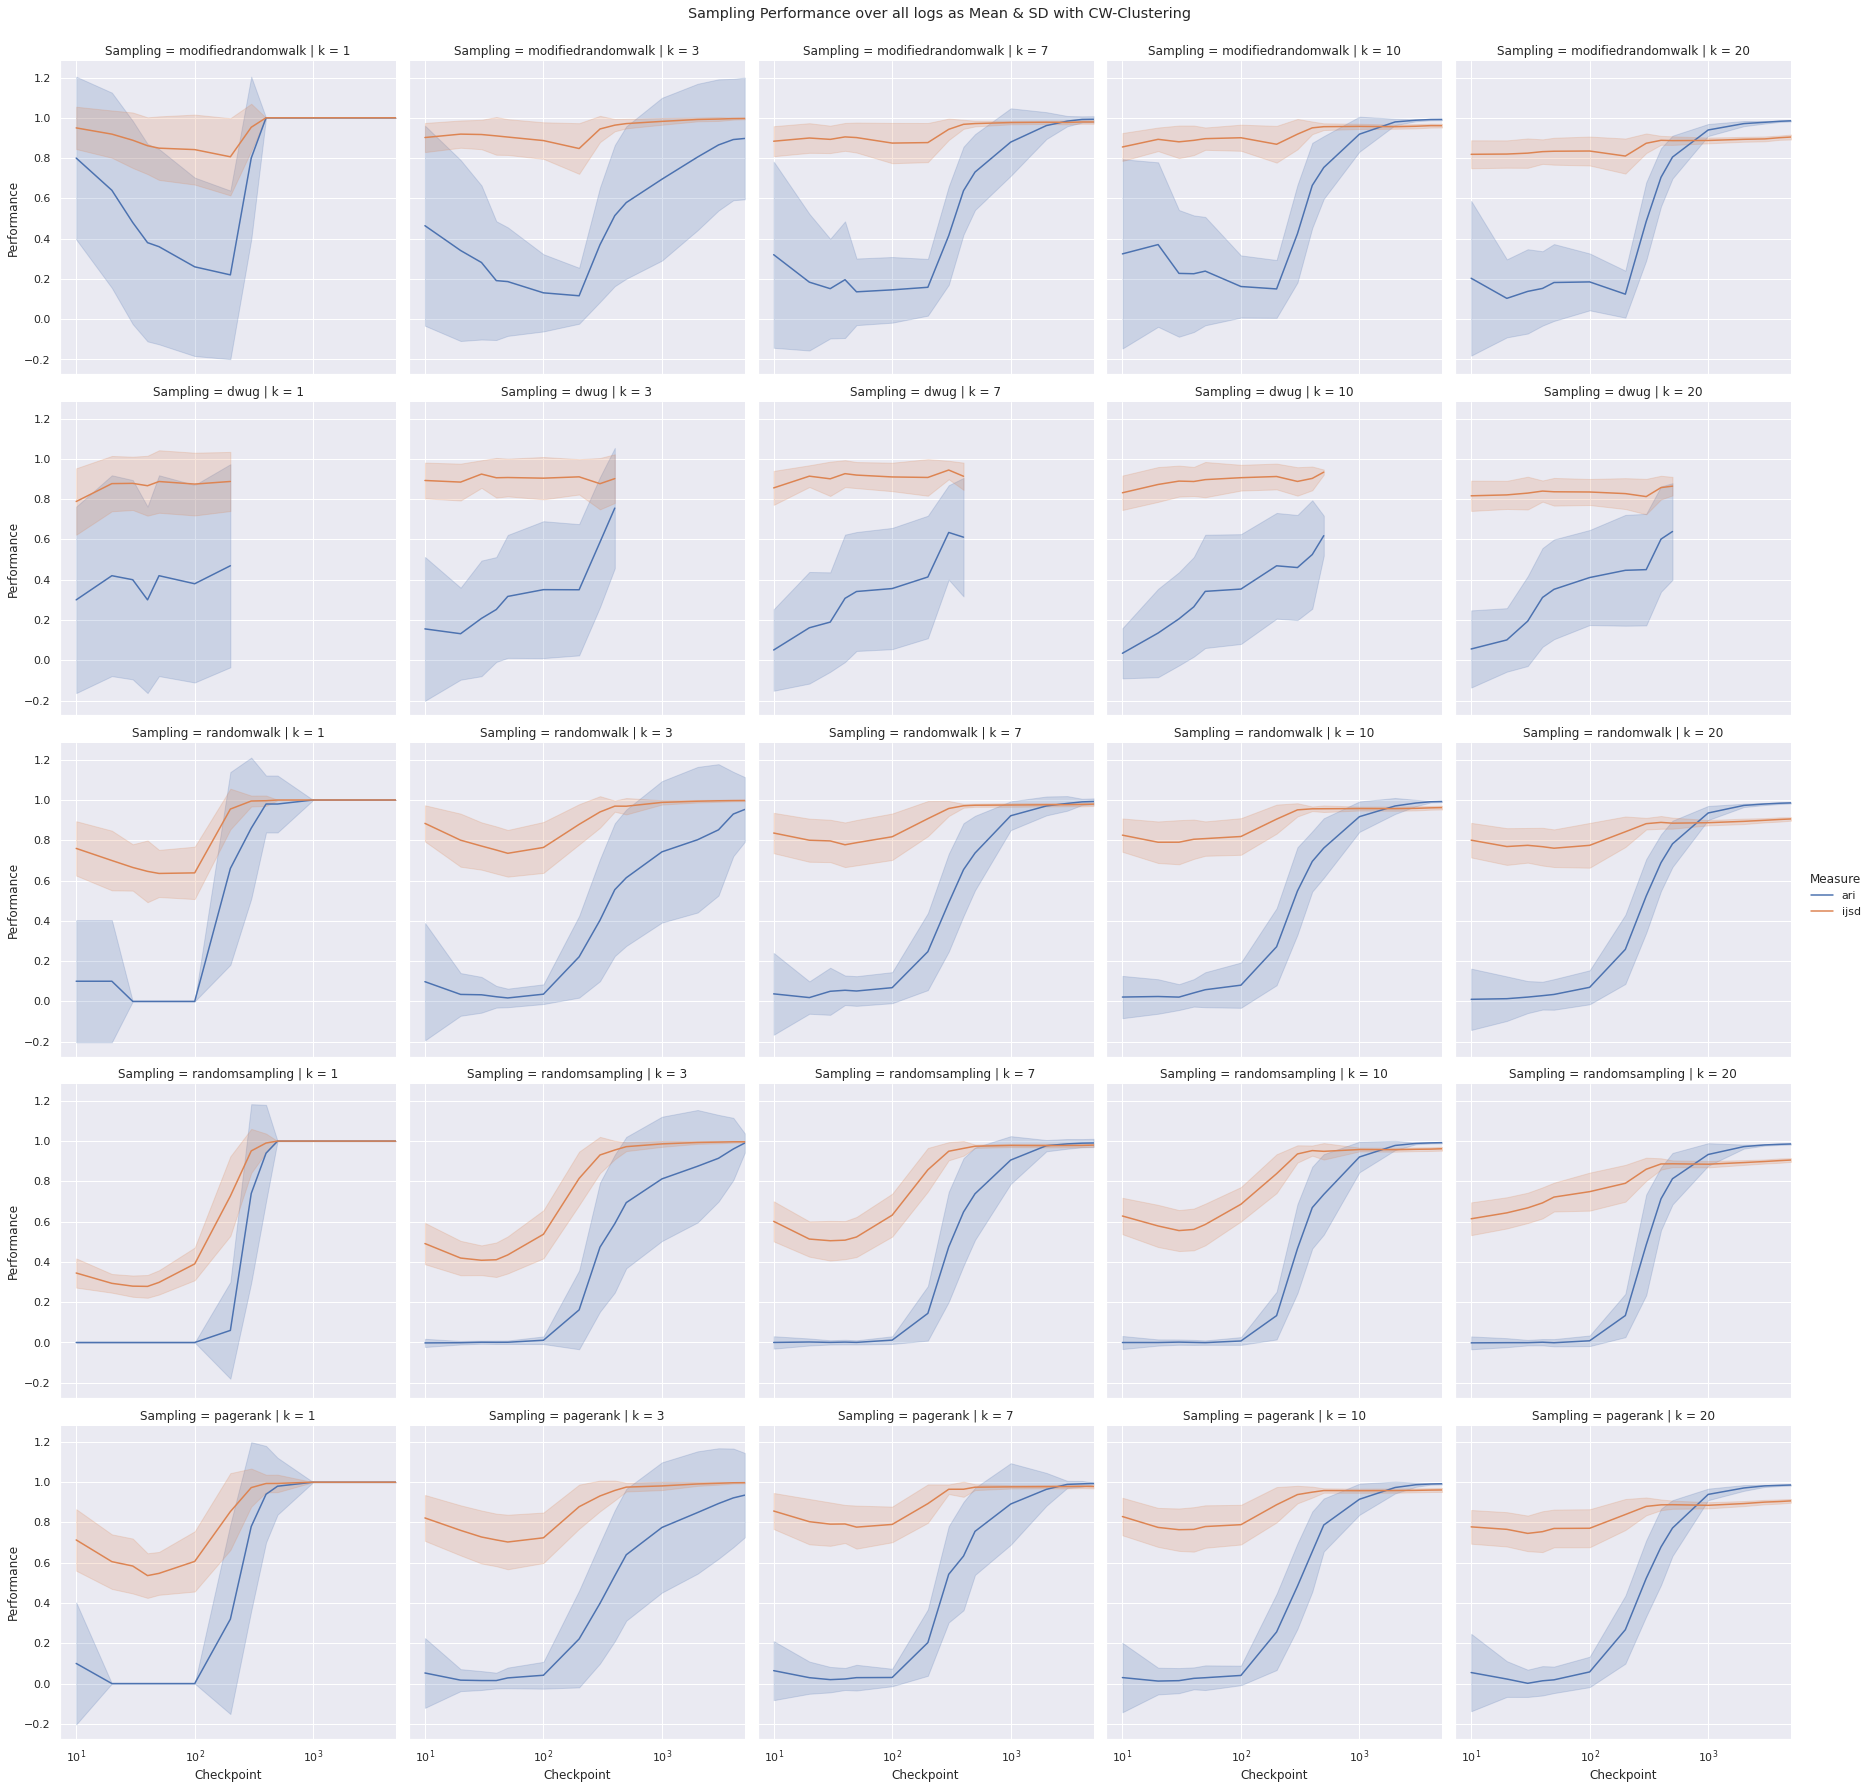

In [8]:
sampling_cw = df.query('Clustering == "cw"')
df_sampl_cw = pd.melt(sampling_cw, id_vars=['Checkpoint', 'Sampling', 'k'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl_cw,
    x='Checkpoint', y='Performance', hue='Measure', col='k', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all logs as Mean & SD with CW-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

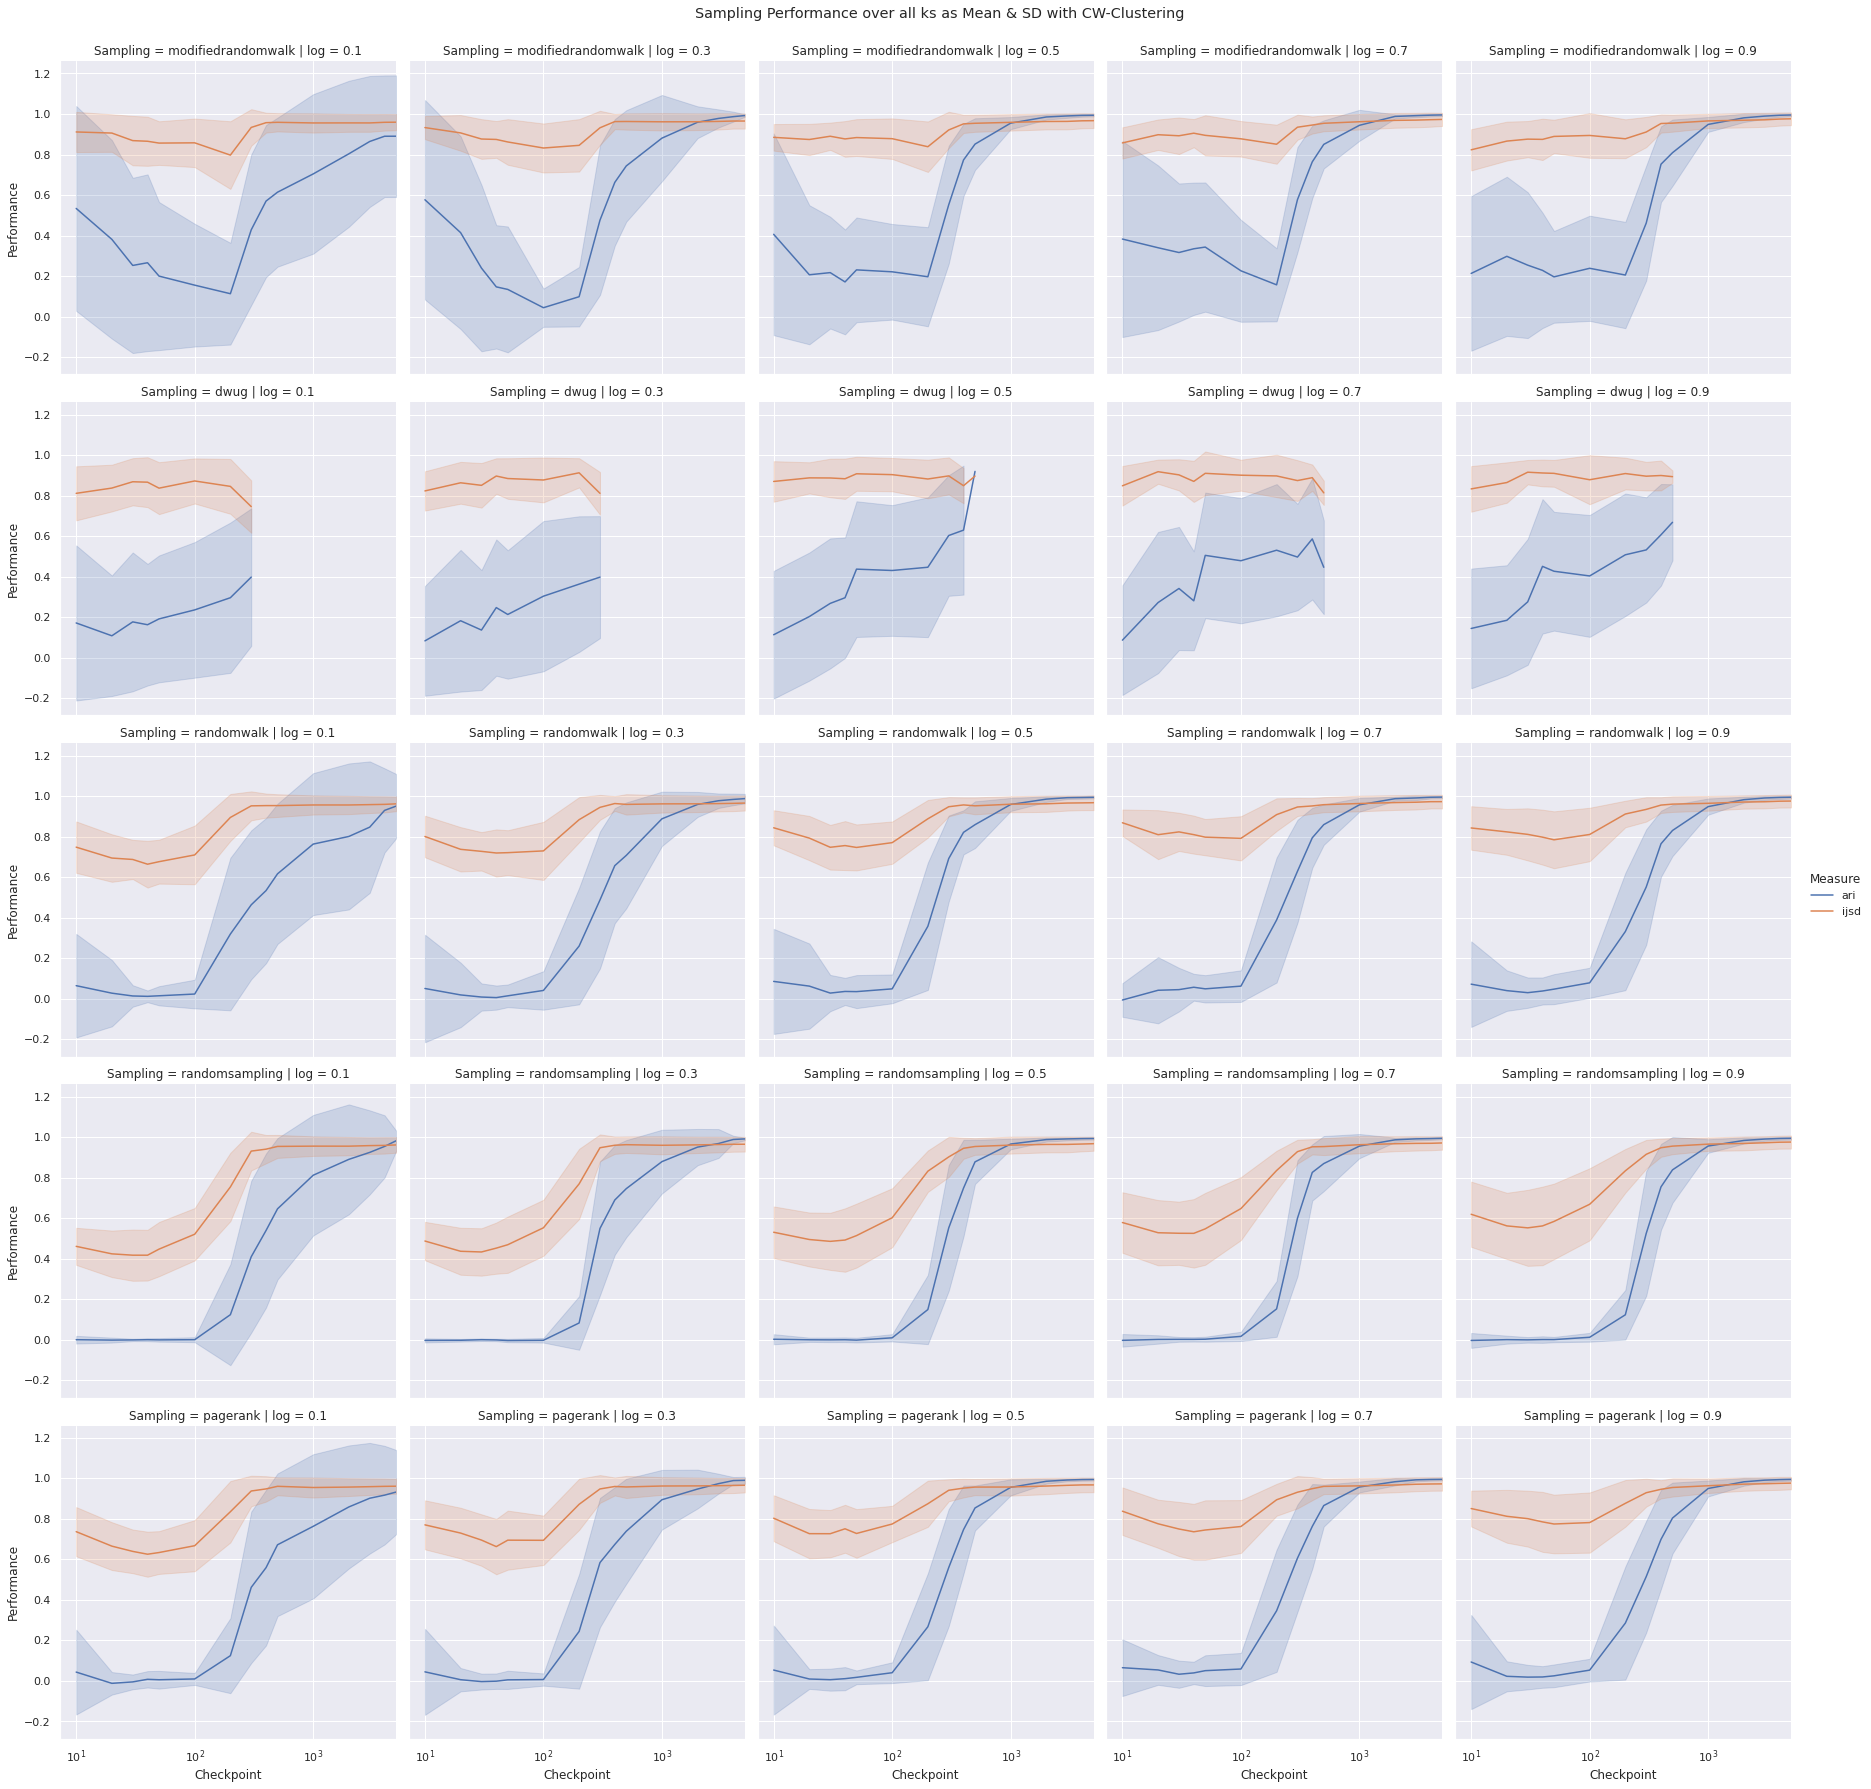

In [10]:
df_sampl_cw = pd.melt(sampling_cw, id_vars=['Checkpoint', 'Sampling', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl_cw,
    x='Checkpoint', y='Performance', hue='Measure', col='log', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all ks as Mean & SD with CW-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

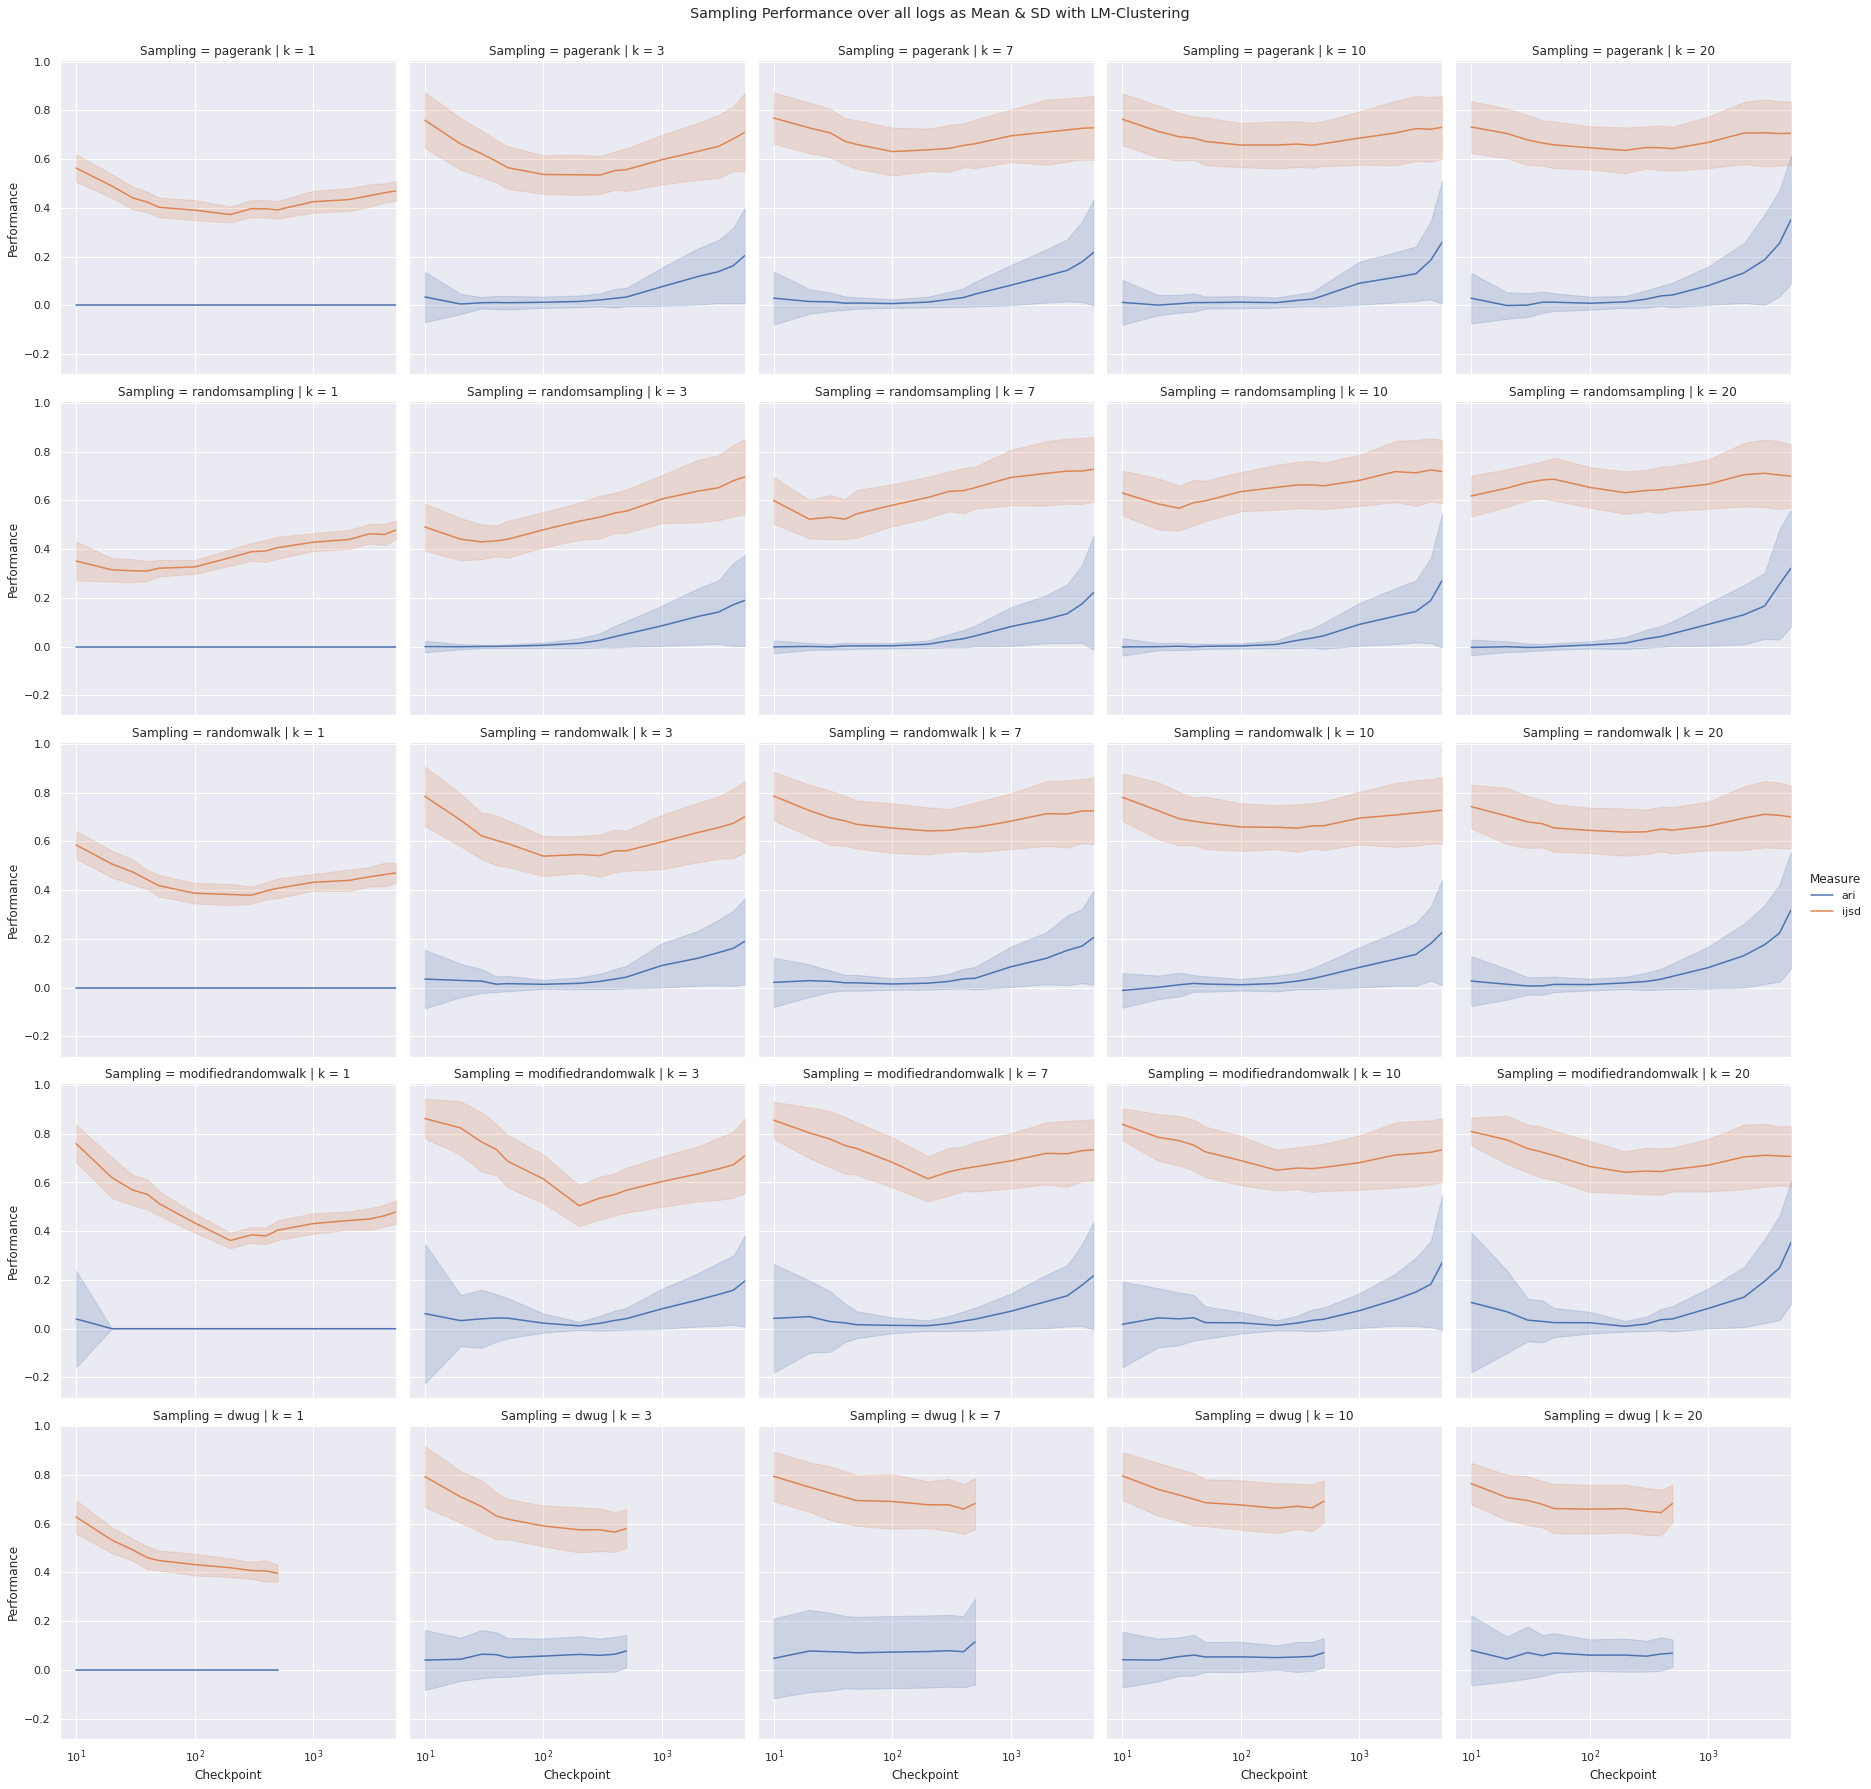

In [12]:
sampling_lm = df.query('Clustering == "lm"')
df_sampl = pd.melt(sampling_lm, id_vars=['Checkpoint', 'Sampling', 'k'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl,
    x='Checkpoint', y='Performance', hue='Measure', col='k', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all logs as Mean & SD with LM-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

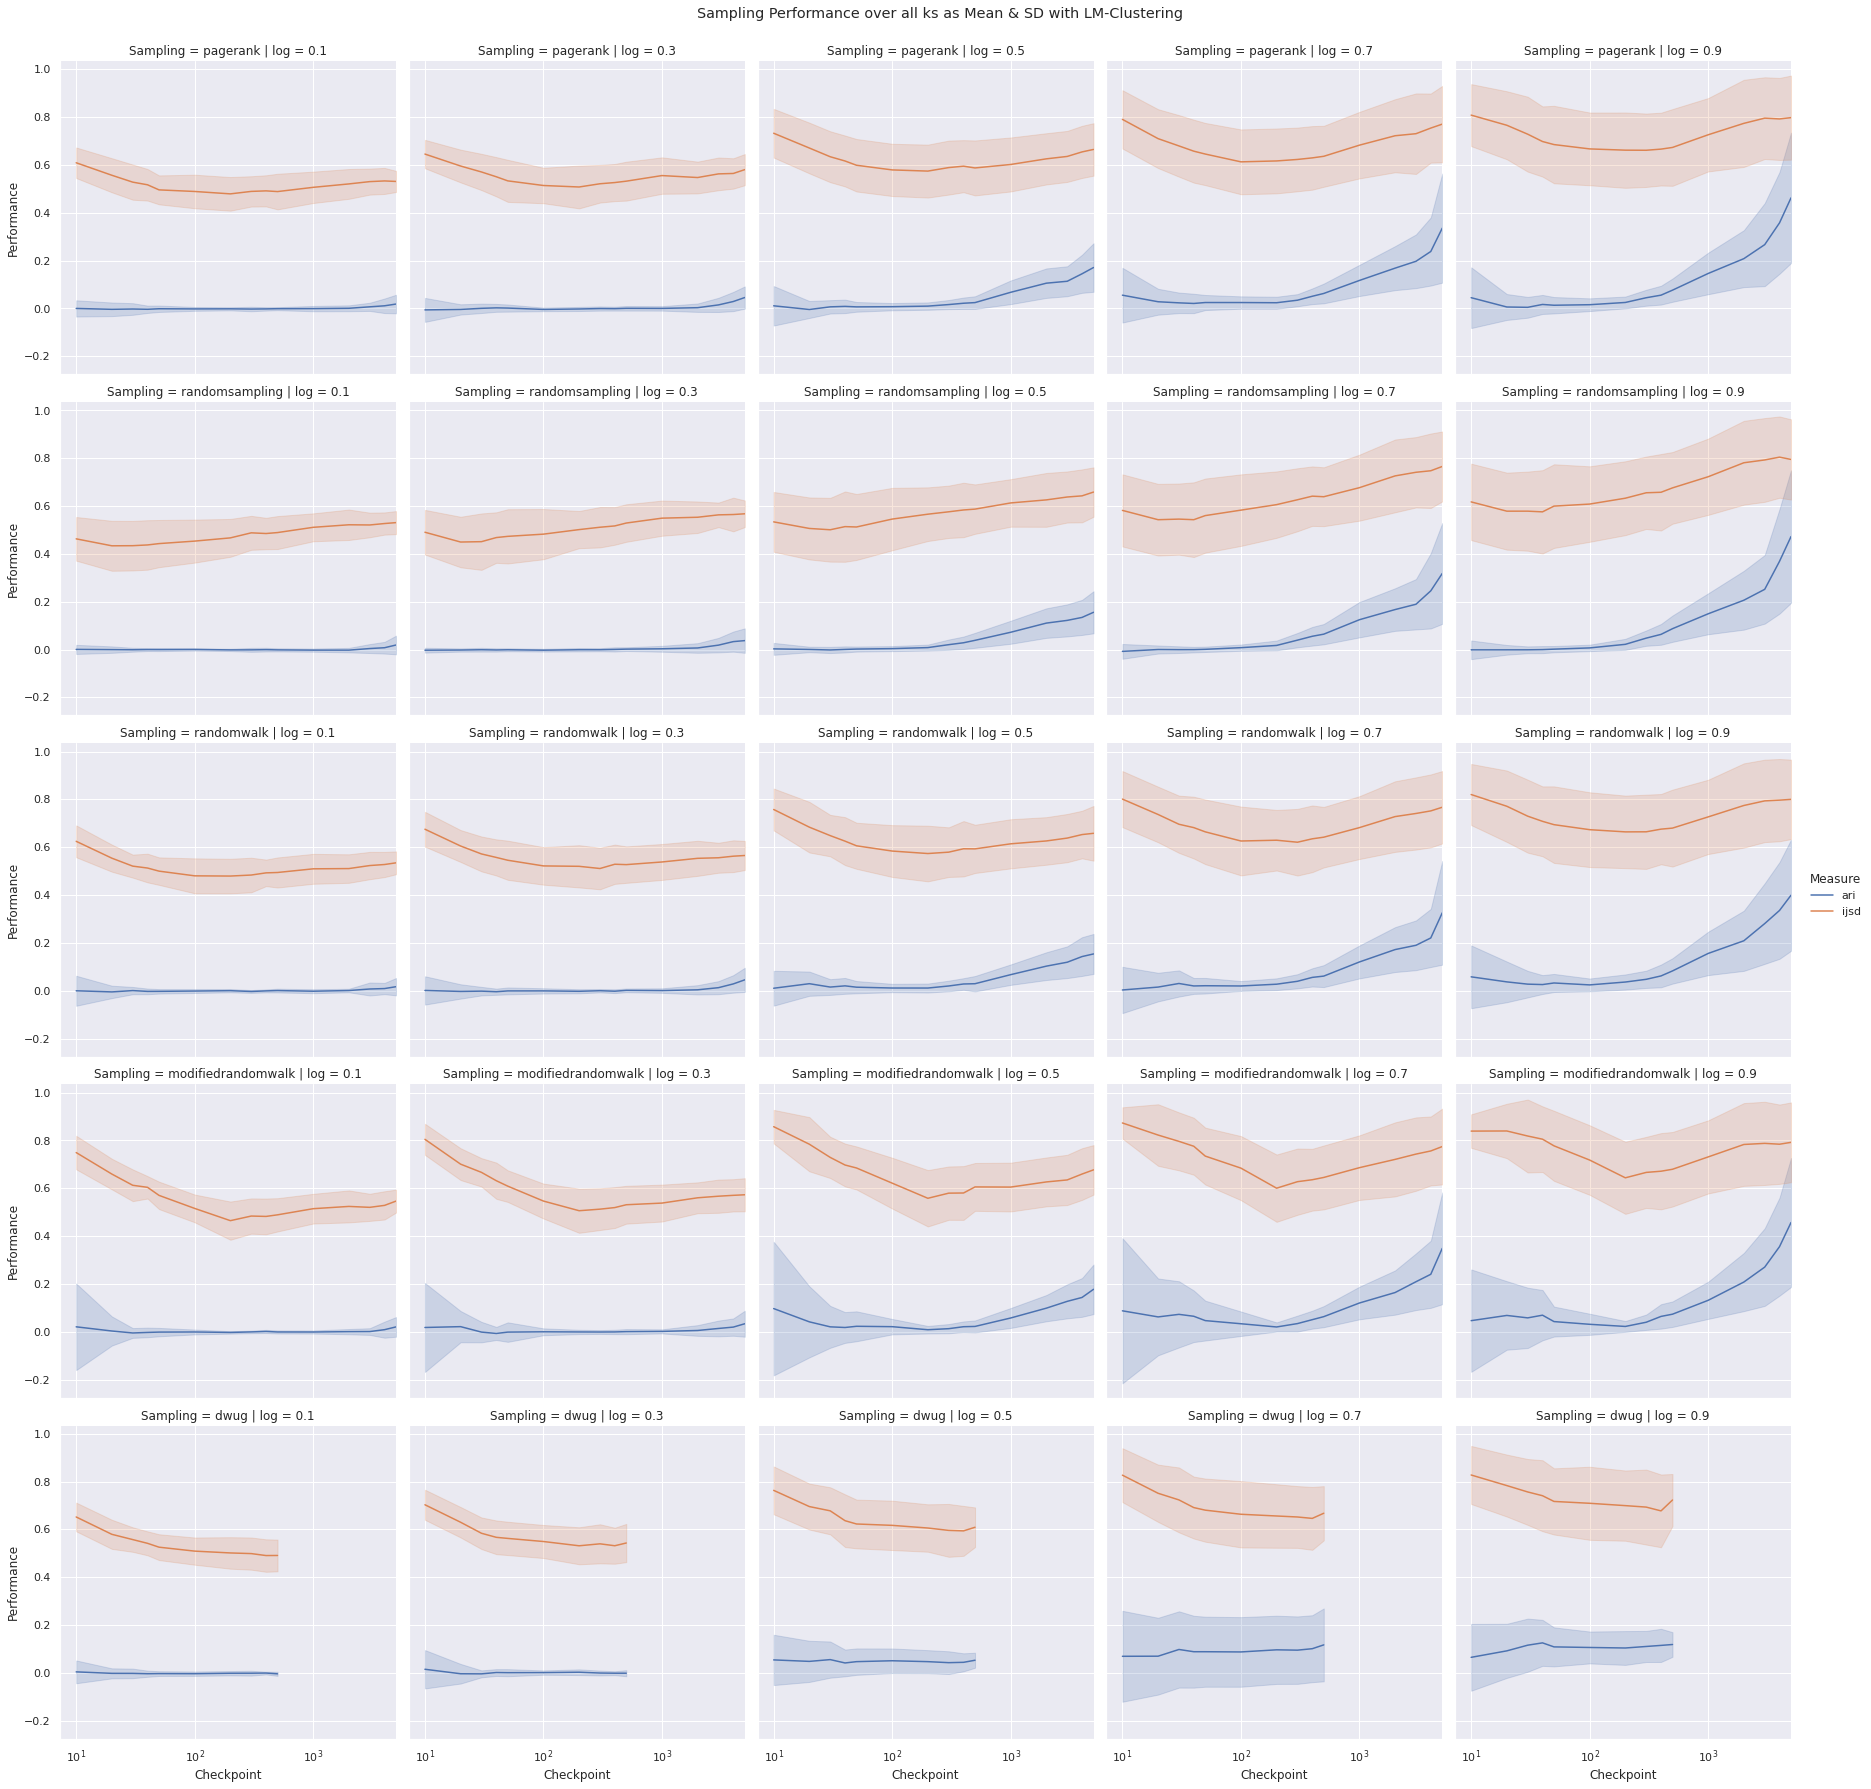

In [14]:
df_sampl = pd.melt(sampling_lm, id_vars=['Checkpoint', 'Sampling', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl,
    x='Checkpoint', y='Performance', hue='Measure', col='log', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all ks as Mean & SD with LM-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

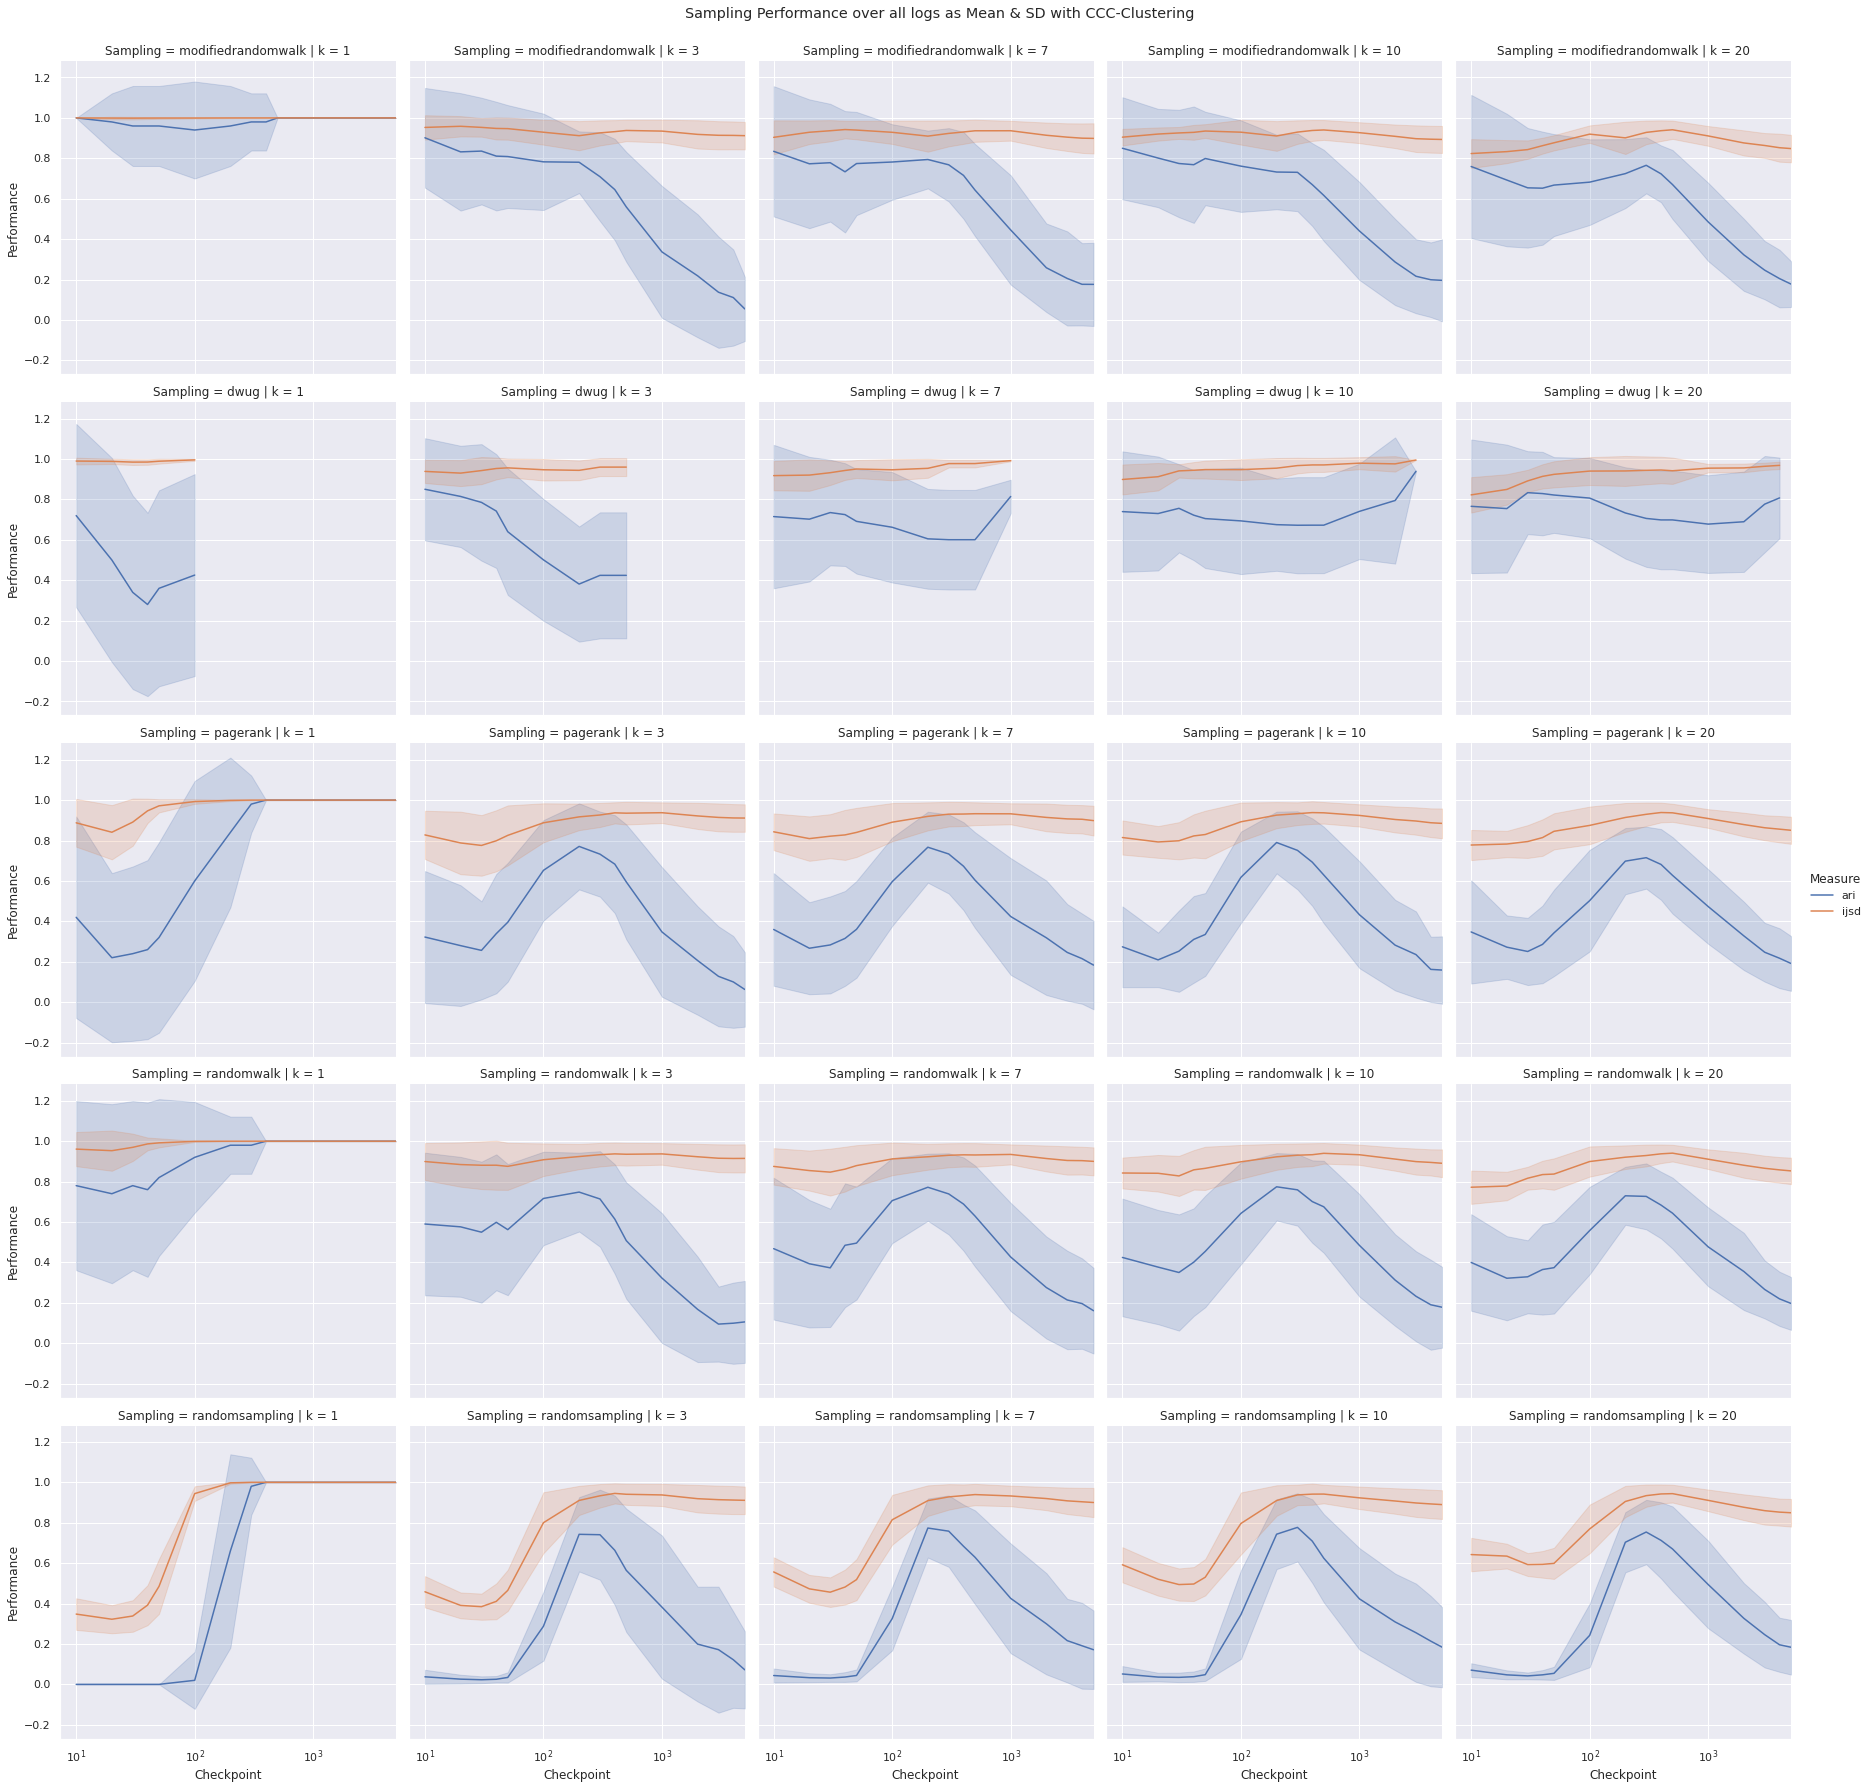

In [16]:
sampling_lm = df.query('Clustering == "ccc"')
df_sampl = pd.melt(sampling_lm, id_vars=['Checkpoint', 'Sampling', 'k'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl,
    x='Checkpoint', y='Performance', hue='Measure', col='k', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all logs as Mean & SD with CCC-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

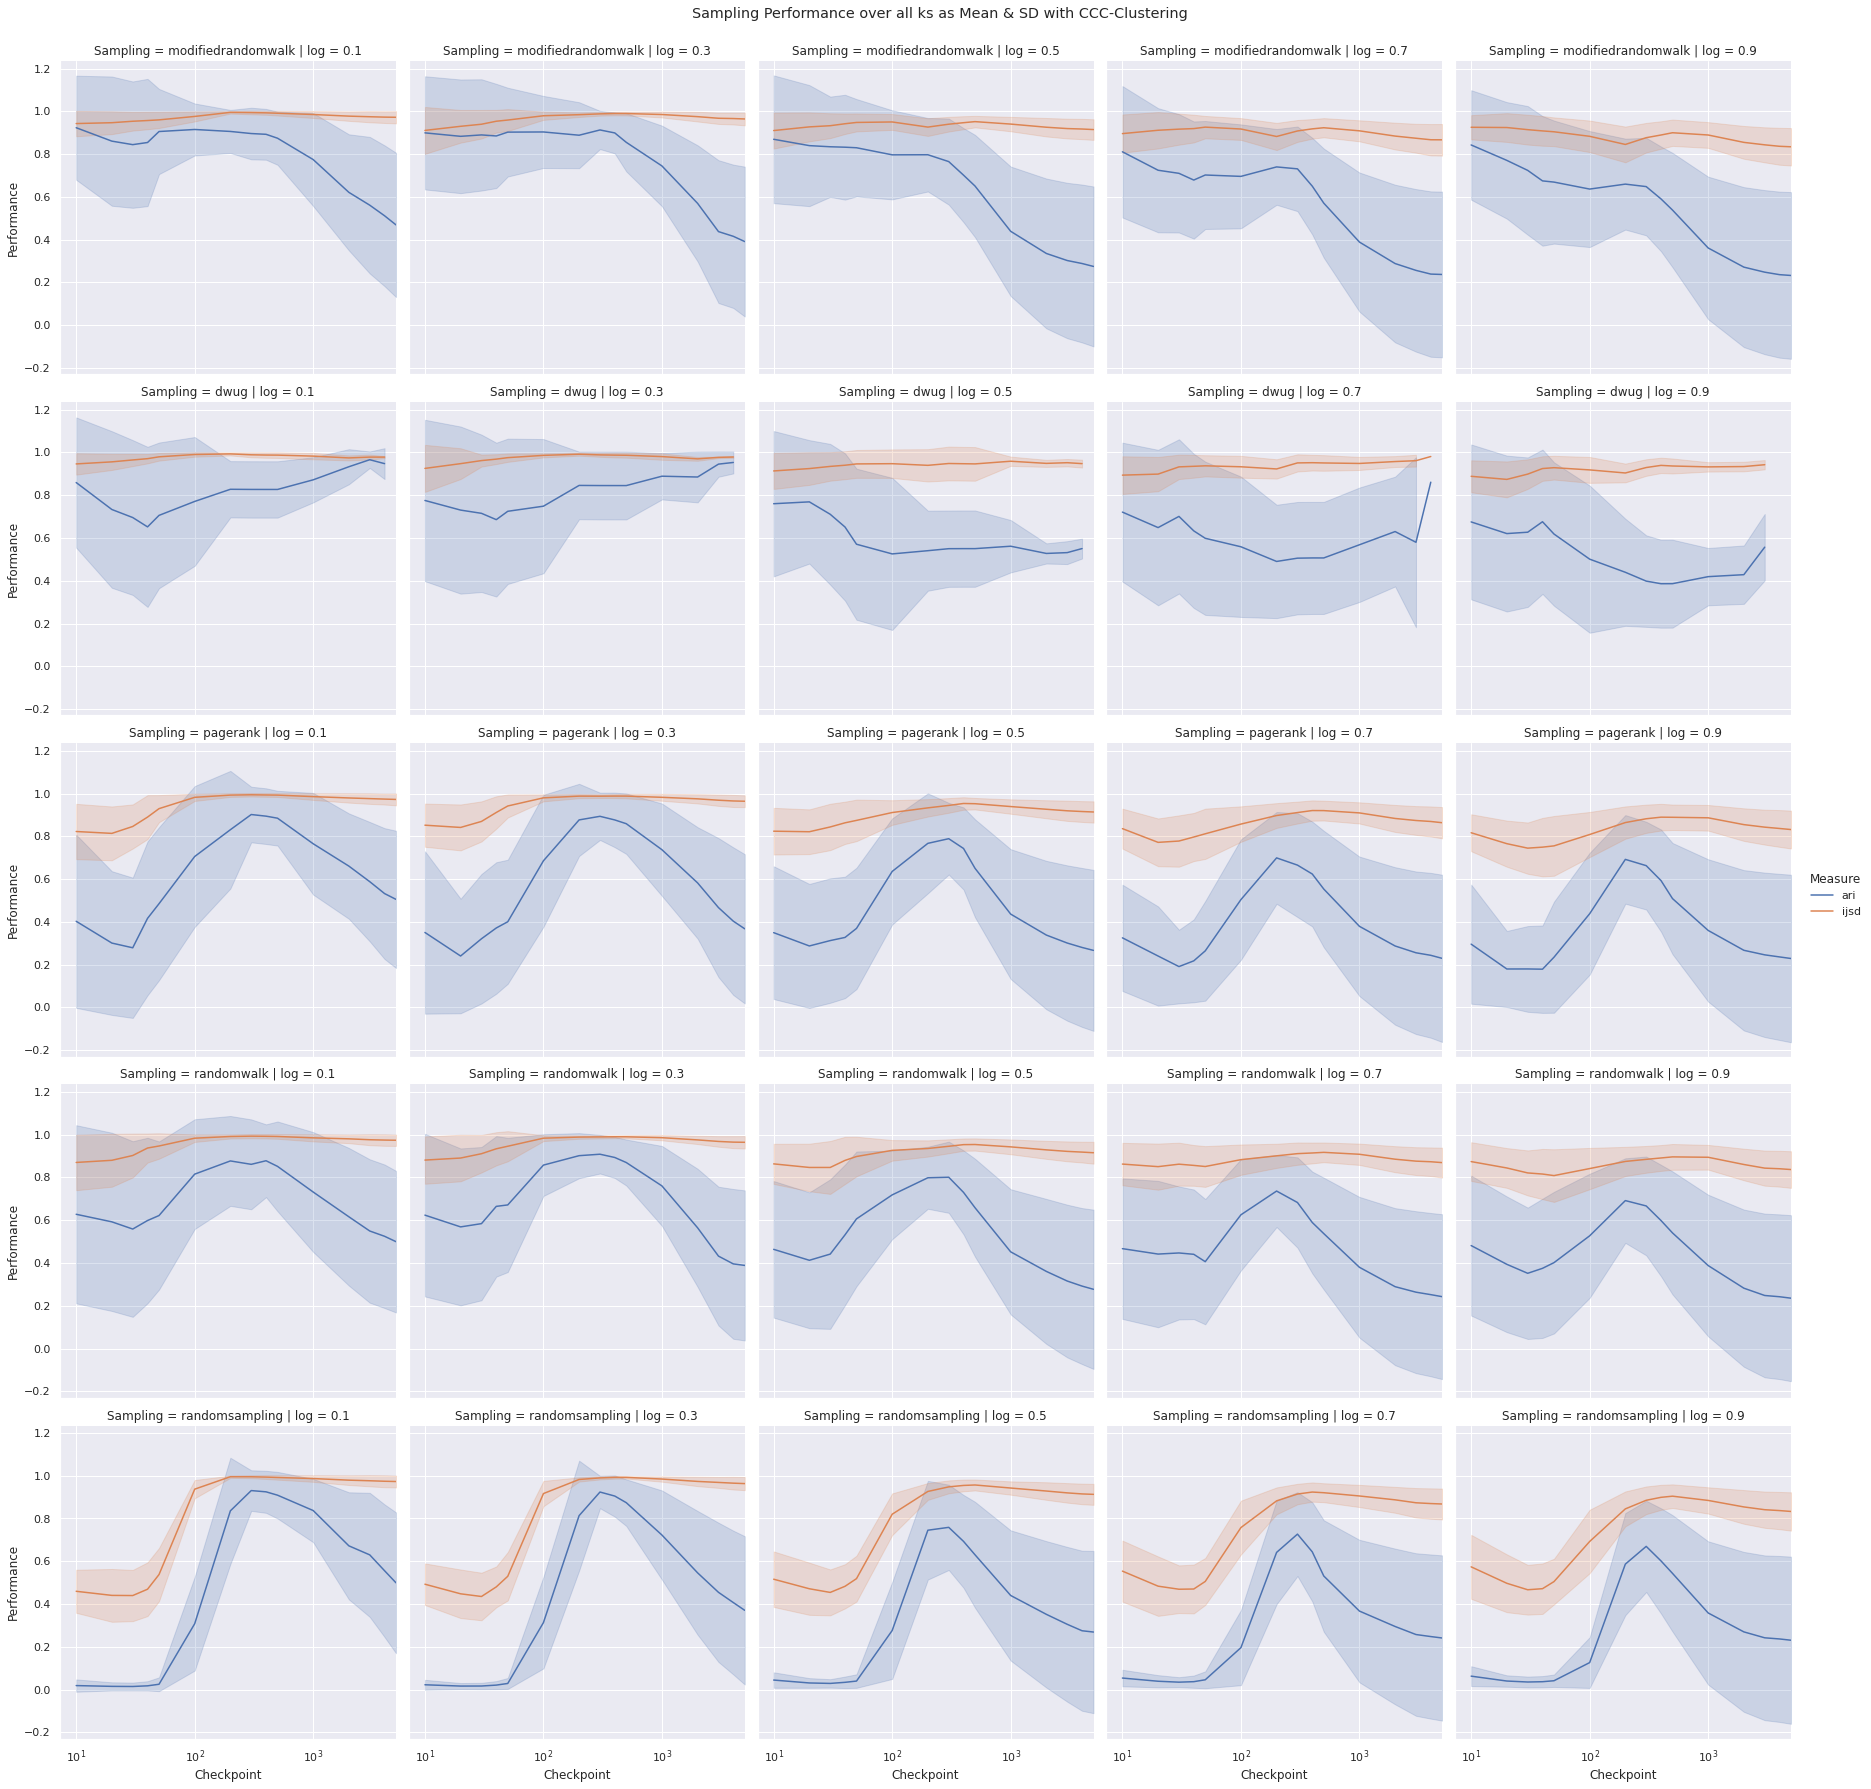

In [18]:
df_sampl = pd.melt(sampling_lm, id_vars=['Checkpoint', 'Sampling', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl,
    x='Checkpoint', y='Performance', hue='Measure', col='log', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all ks as Mean & SD with CCC-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

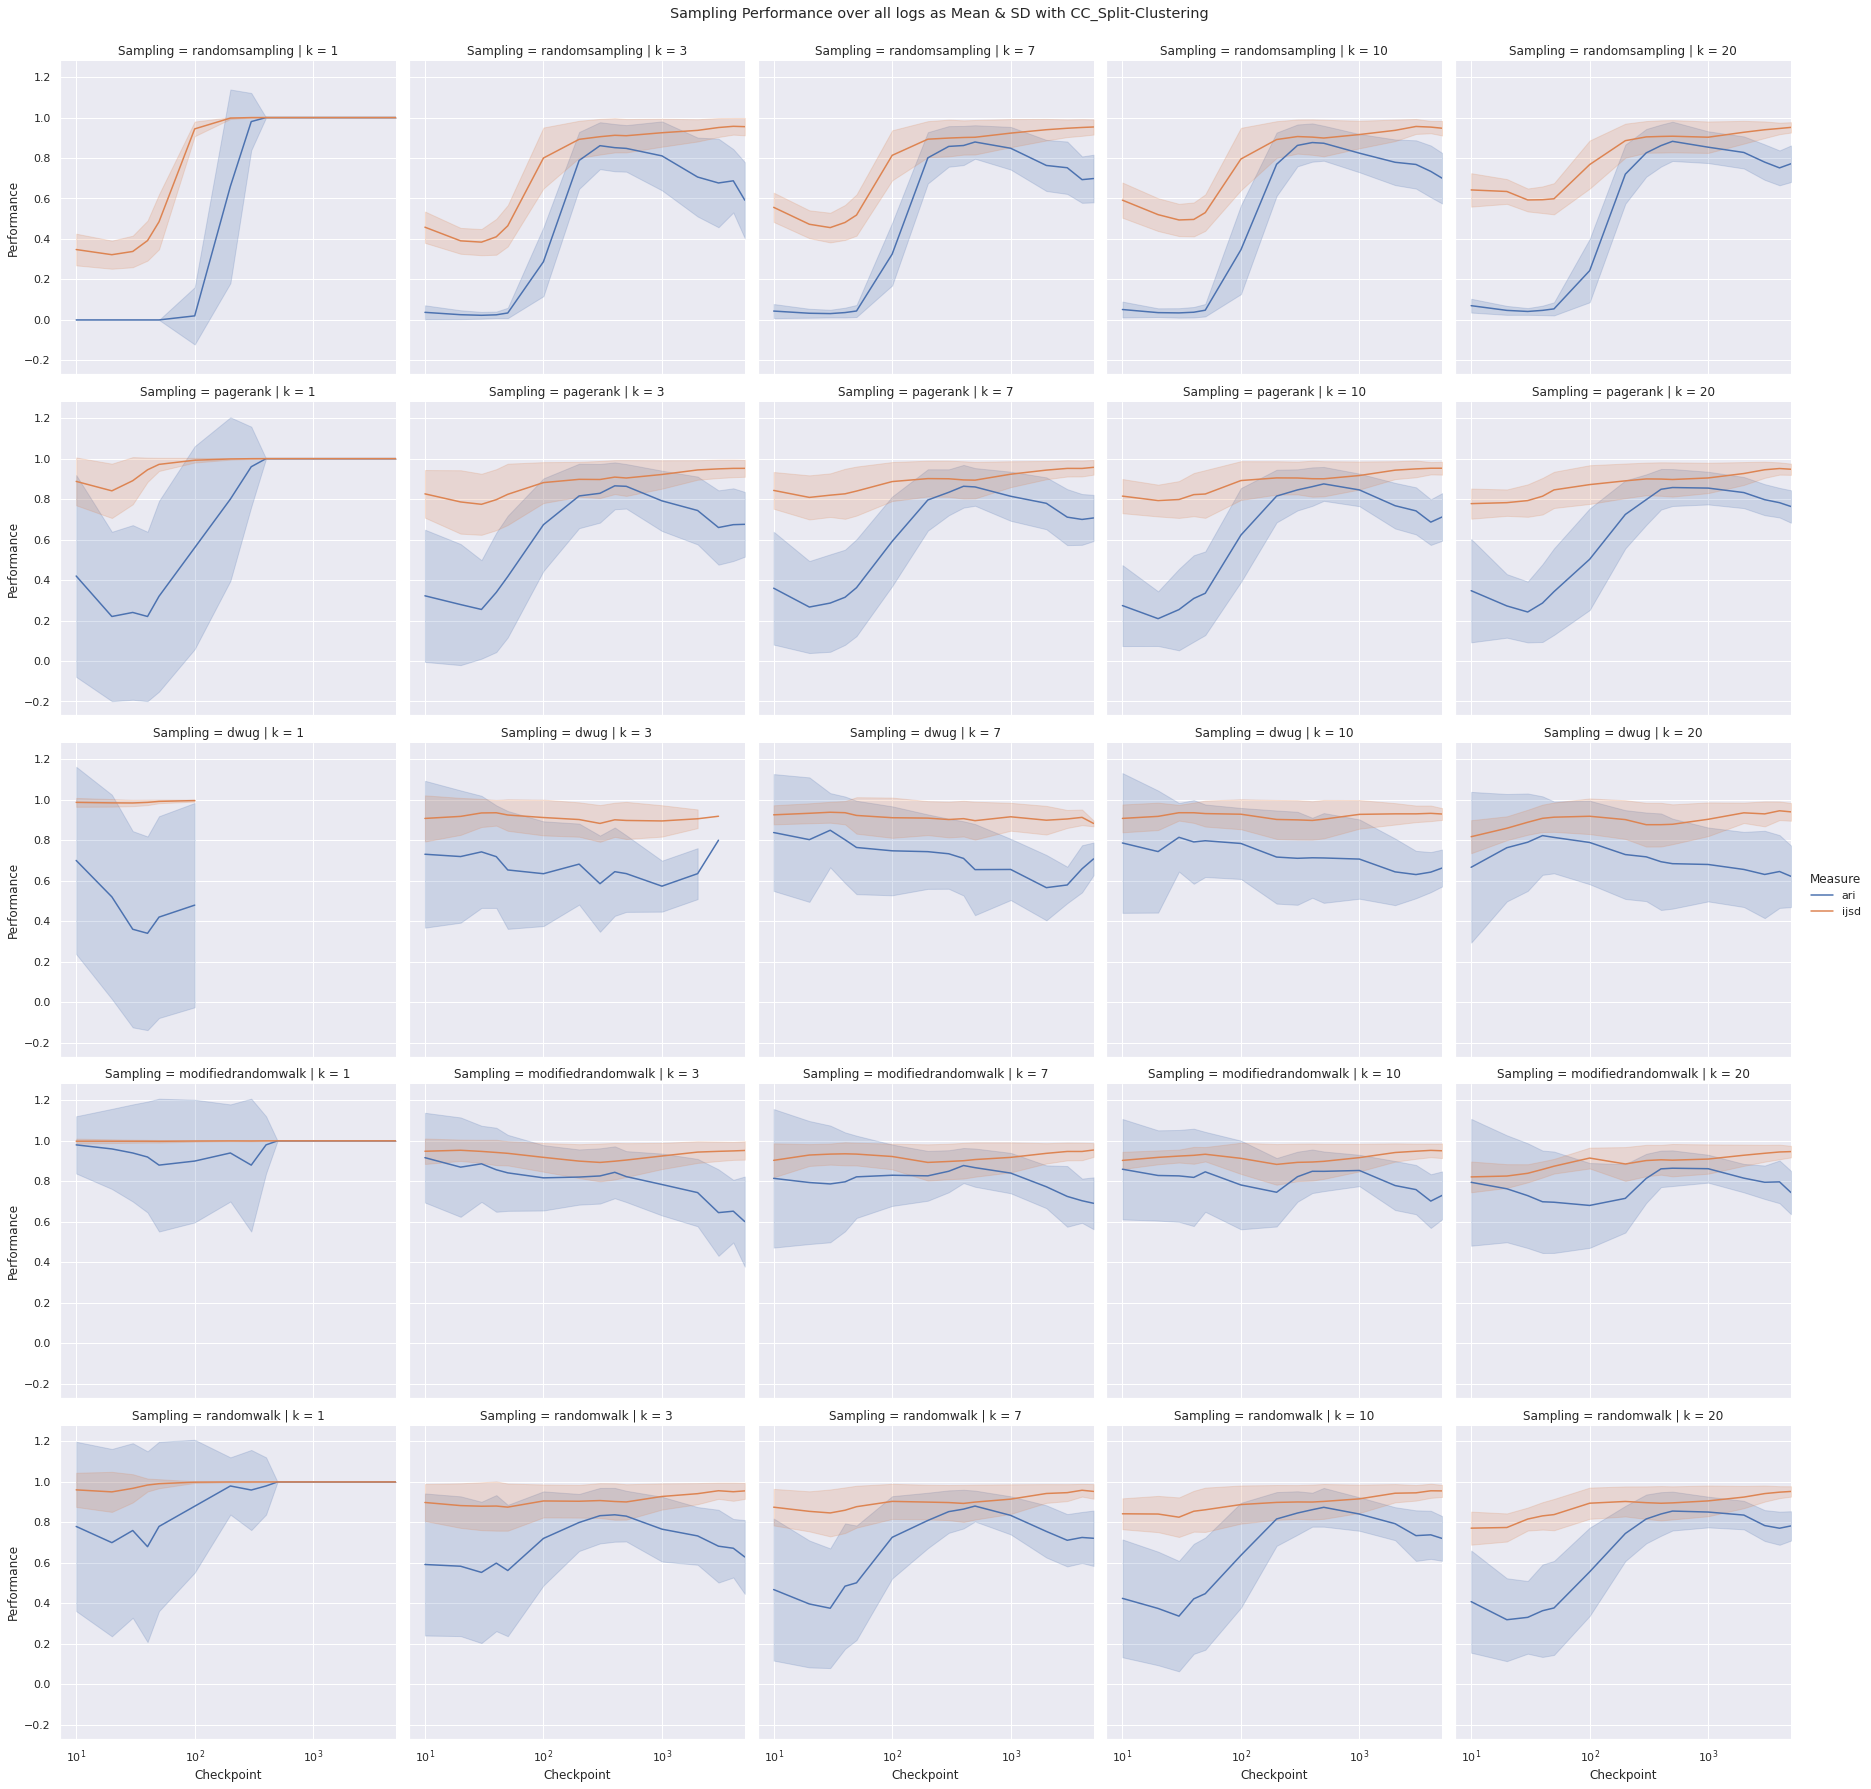

In [20]:
sampling_lm = df.query('Clustering == "cc_split"')
df_sampl = pd.melt(sampling_lm, id_vars=['Checkpoint', 'Sampling', 'k'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl,
    x='Checkpoint', y='Performance', hue='Measure', col='k', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all logs as Mean & SD with CC_Split-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

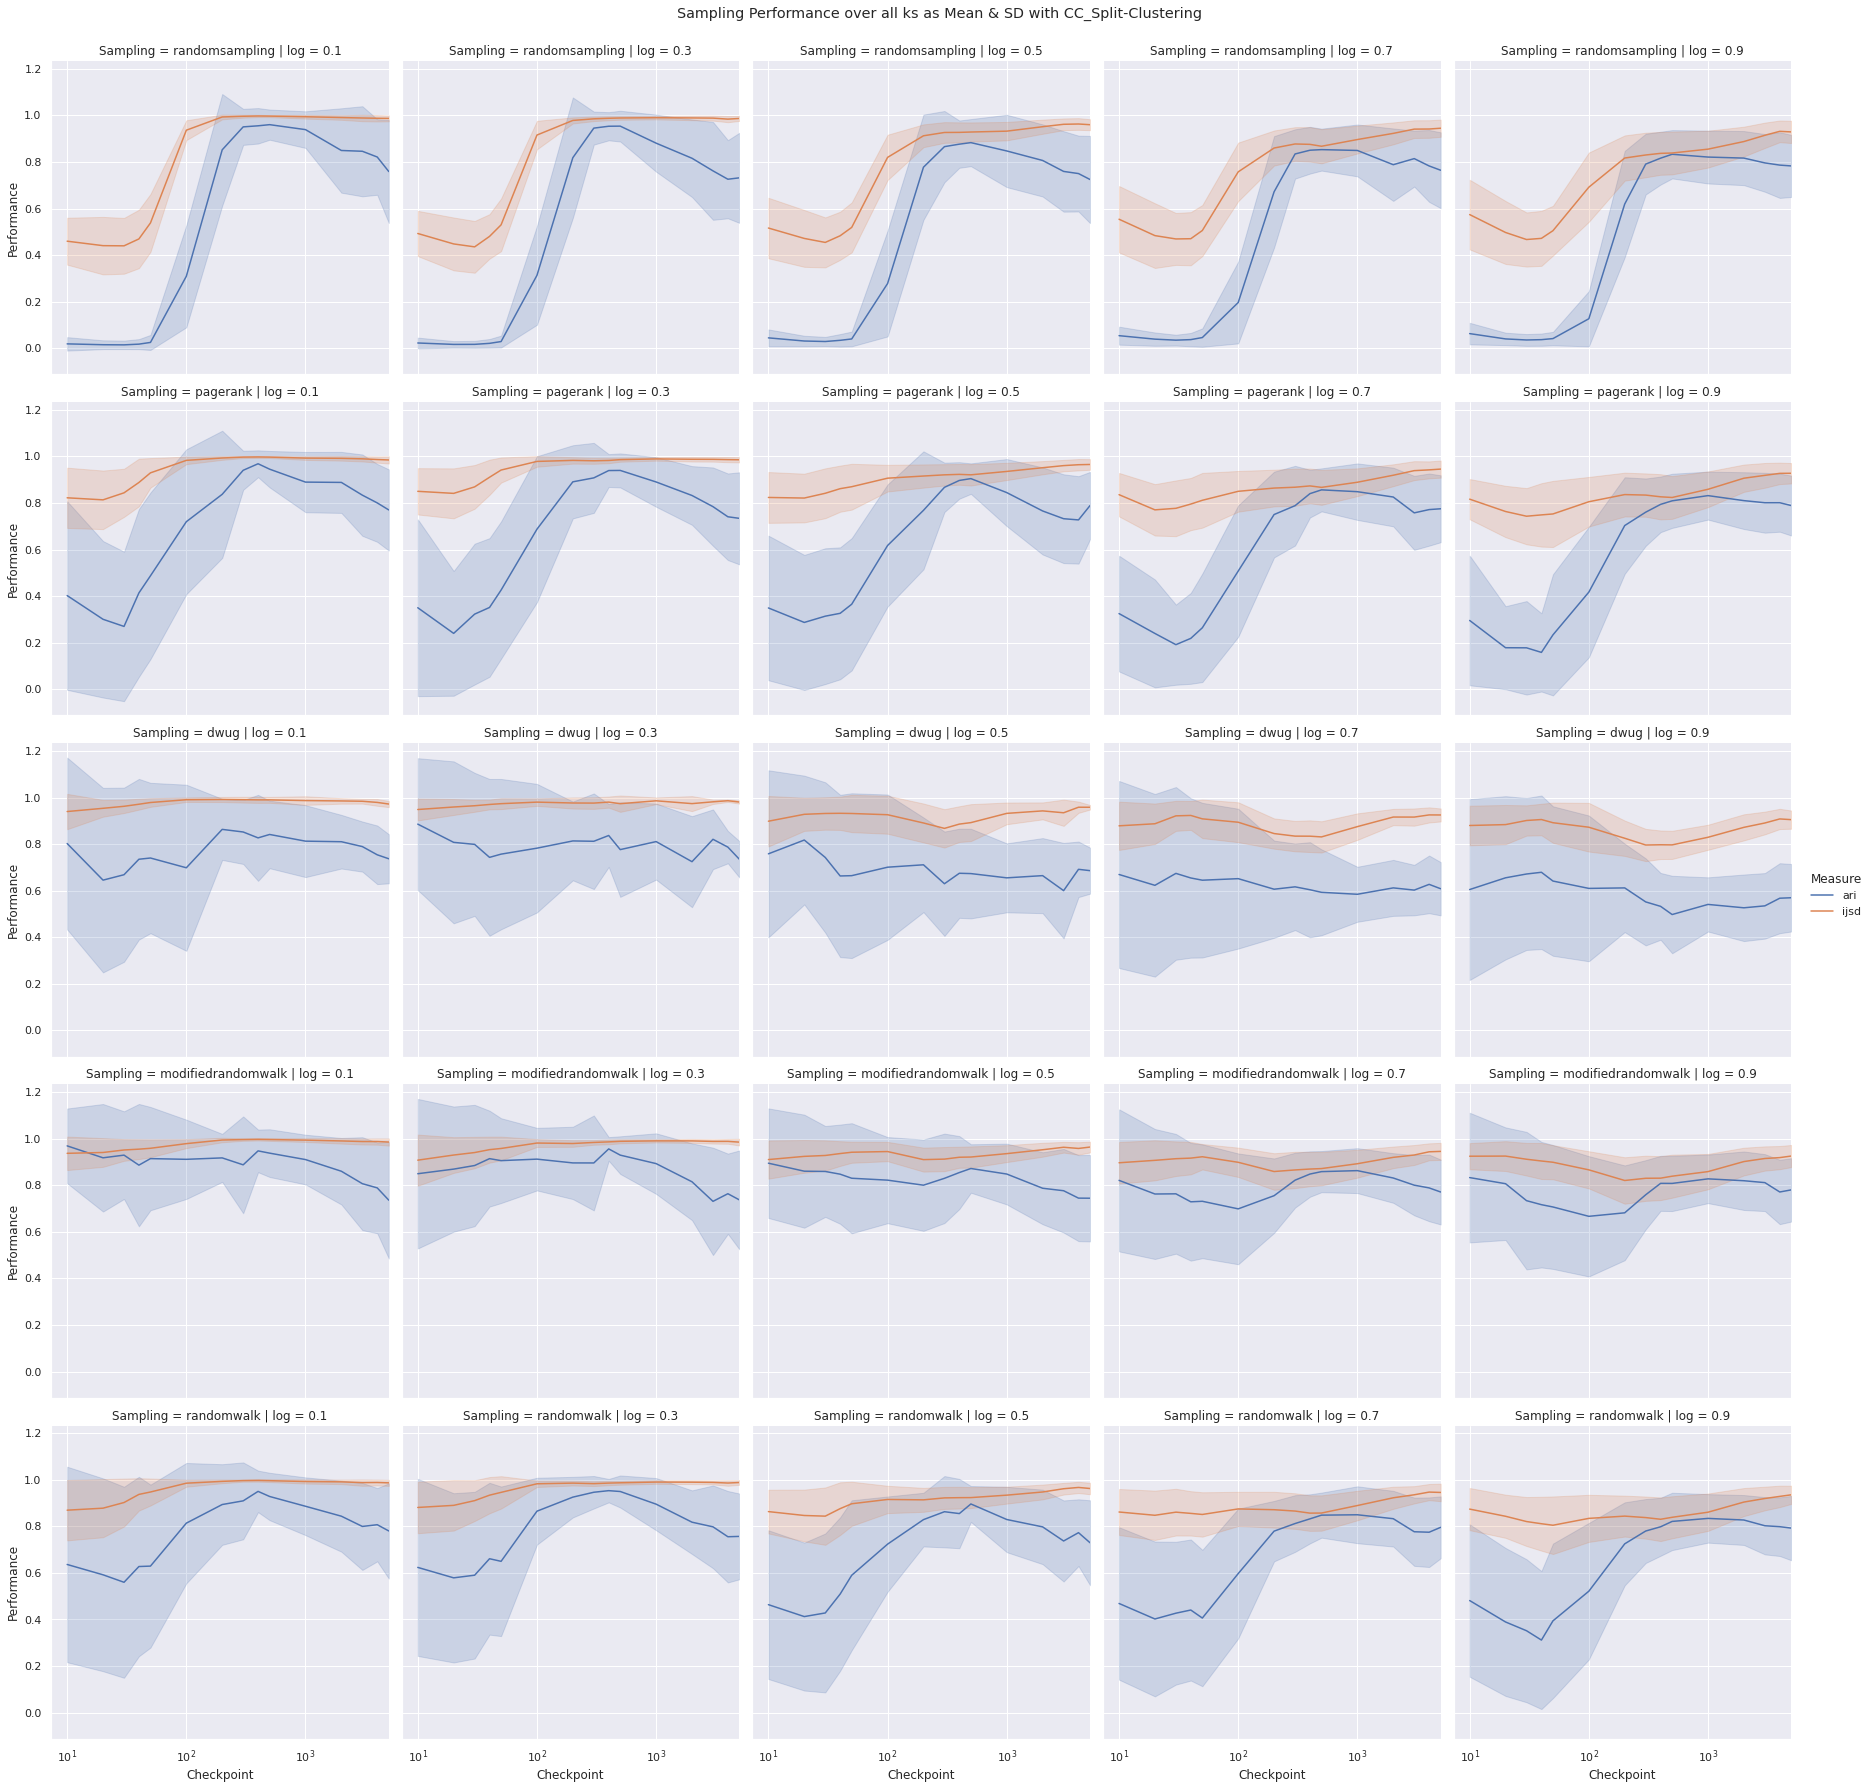

In [22]:
df_sampl = pd.melt(sampling_lm, id_vars=['Checkpoint', 'Sampling', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl,
    x='Checkpoint', y='Performance', hue='Measure', col='log', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all ks as Mean & SD with CC_Split-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

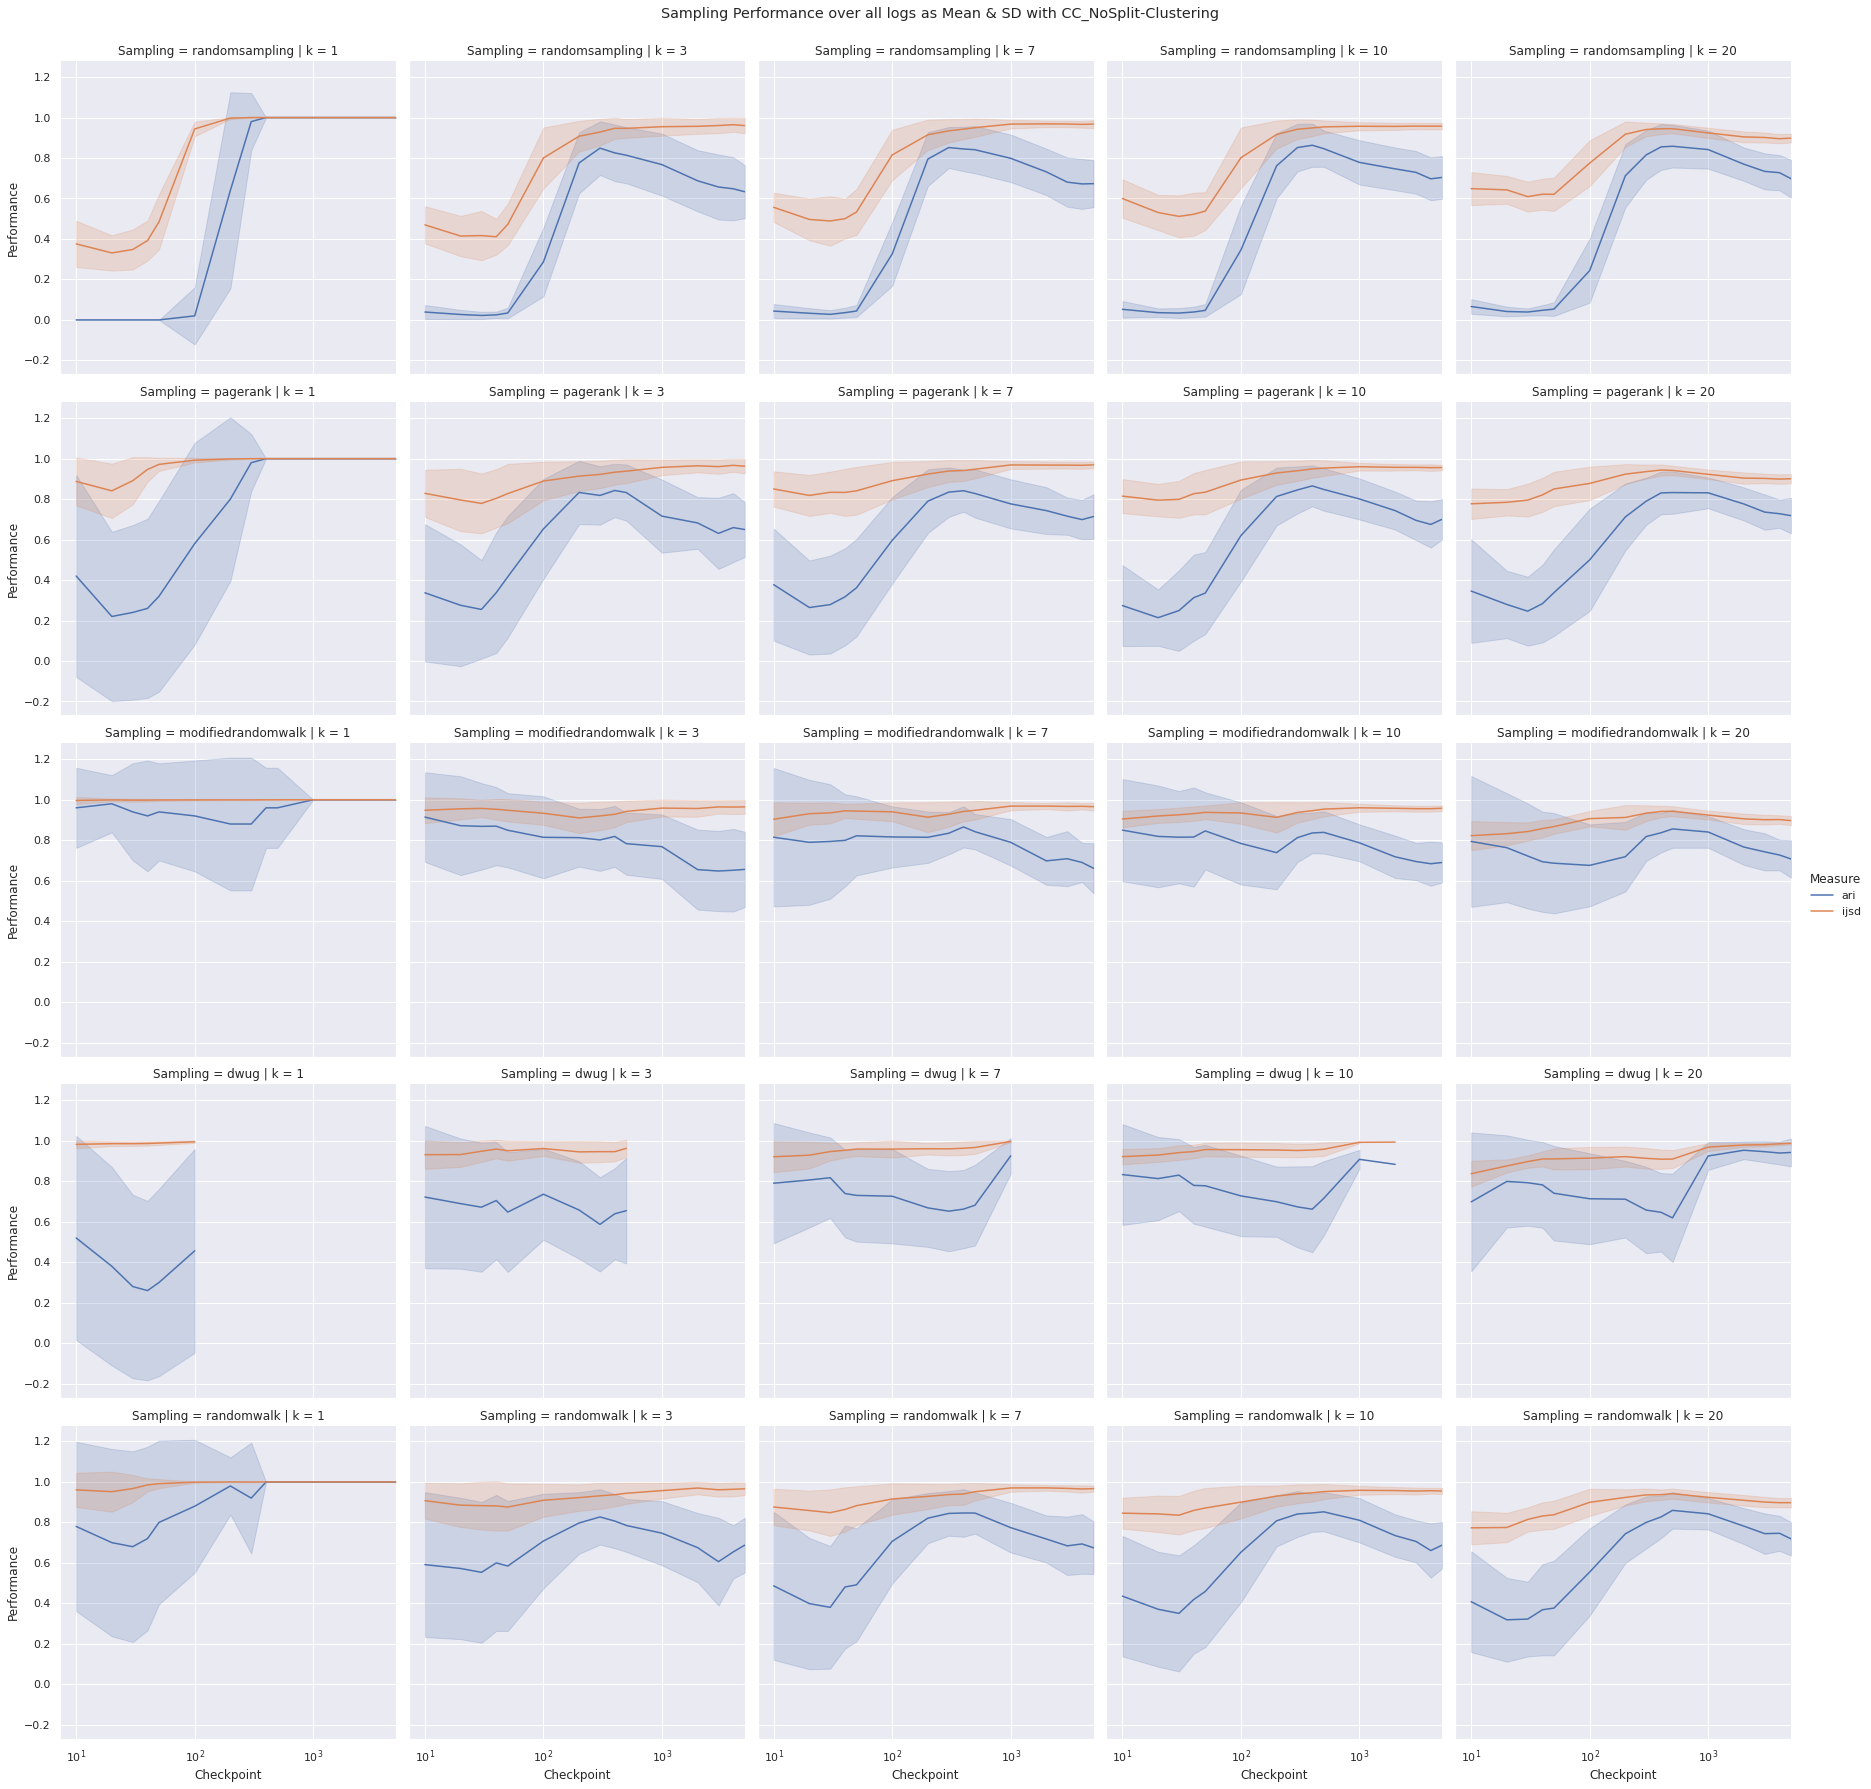

In [24]:
sampling_lm = df.query('Clustering == "cc_nosplit"')
df_sampl = pd.melt(sampling_lm, id_vars=['Checkpoint', 'Sampling', 'k'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl,
    x='Checkpoint', y='Performance', hue='Measure', col='k', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all logs as Mean & SD with CC_NoSplit-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

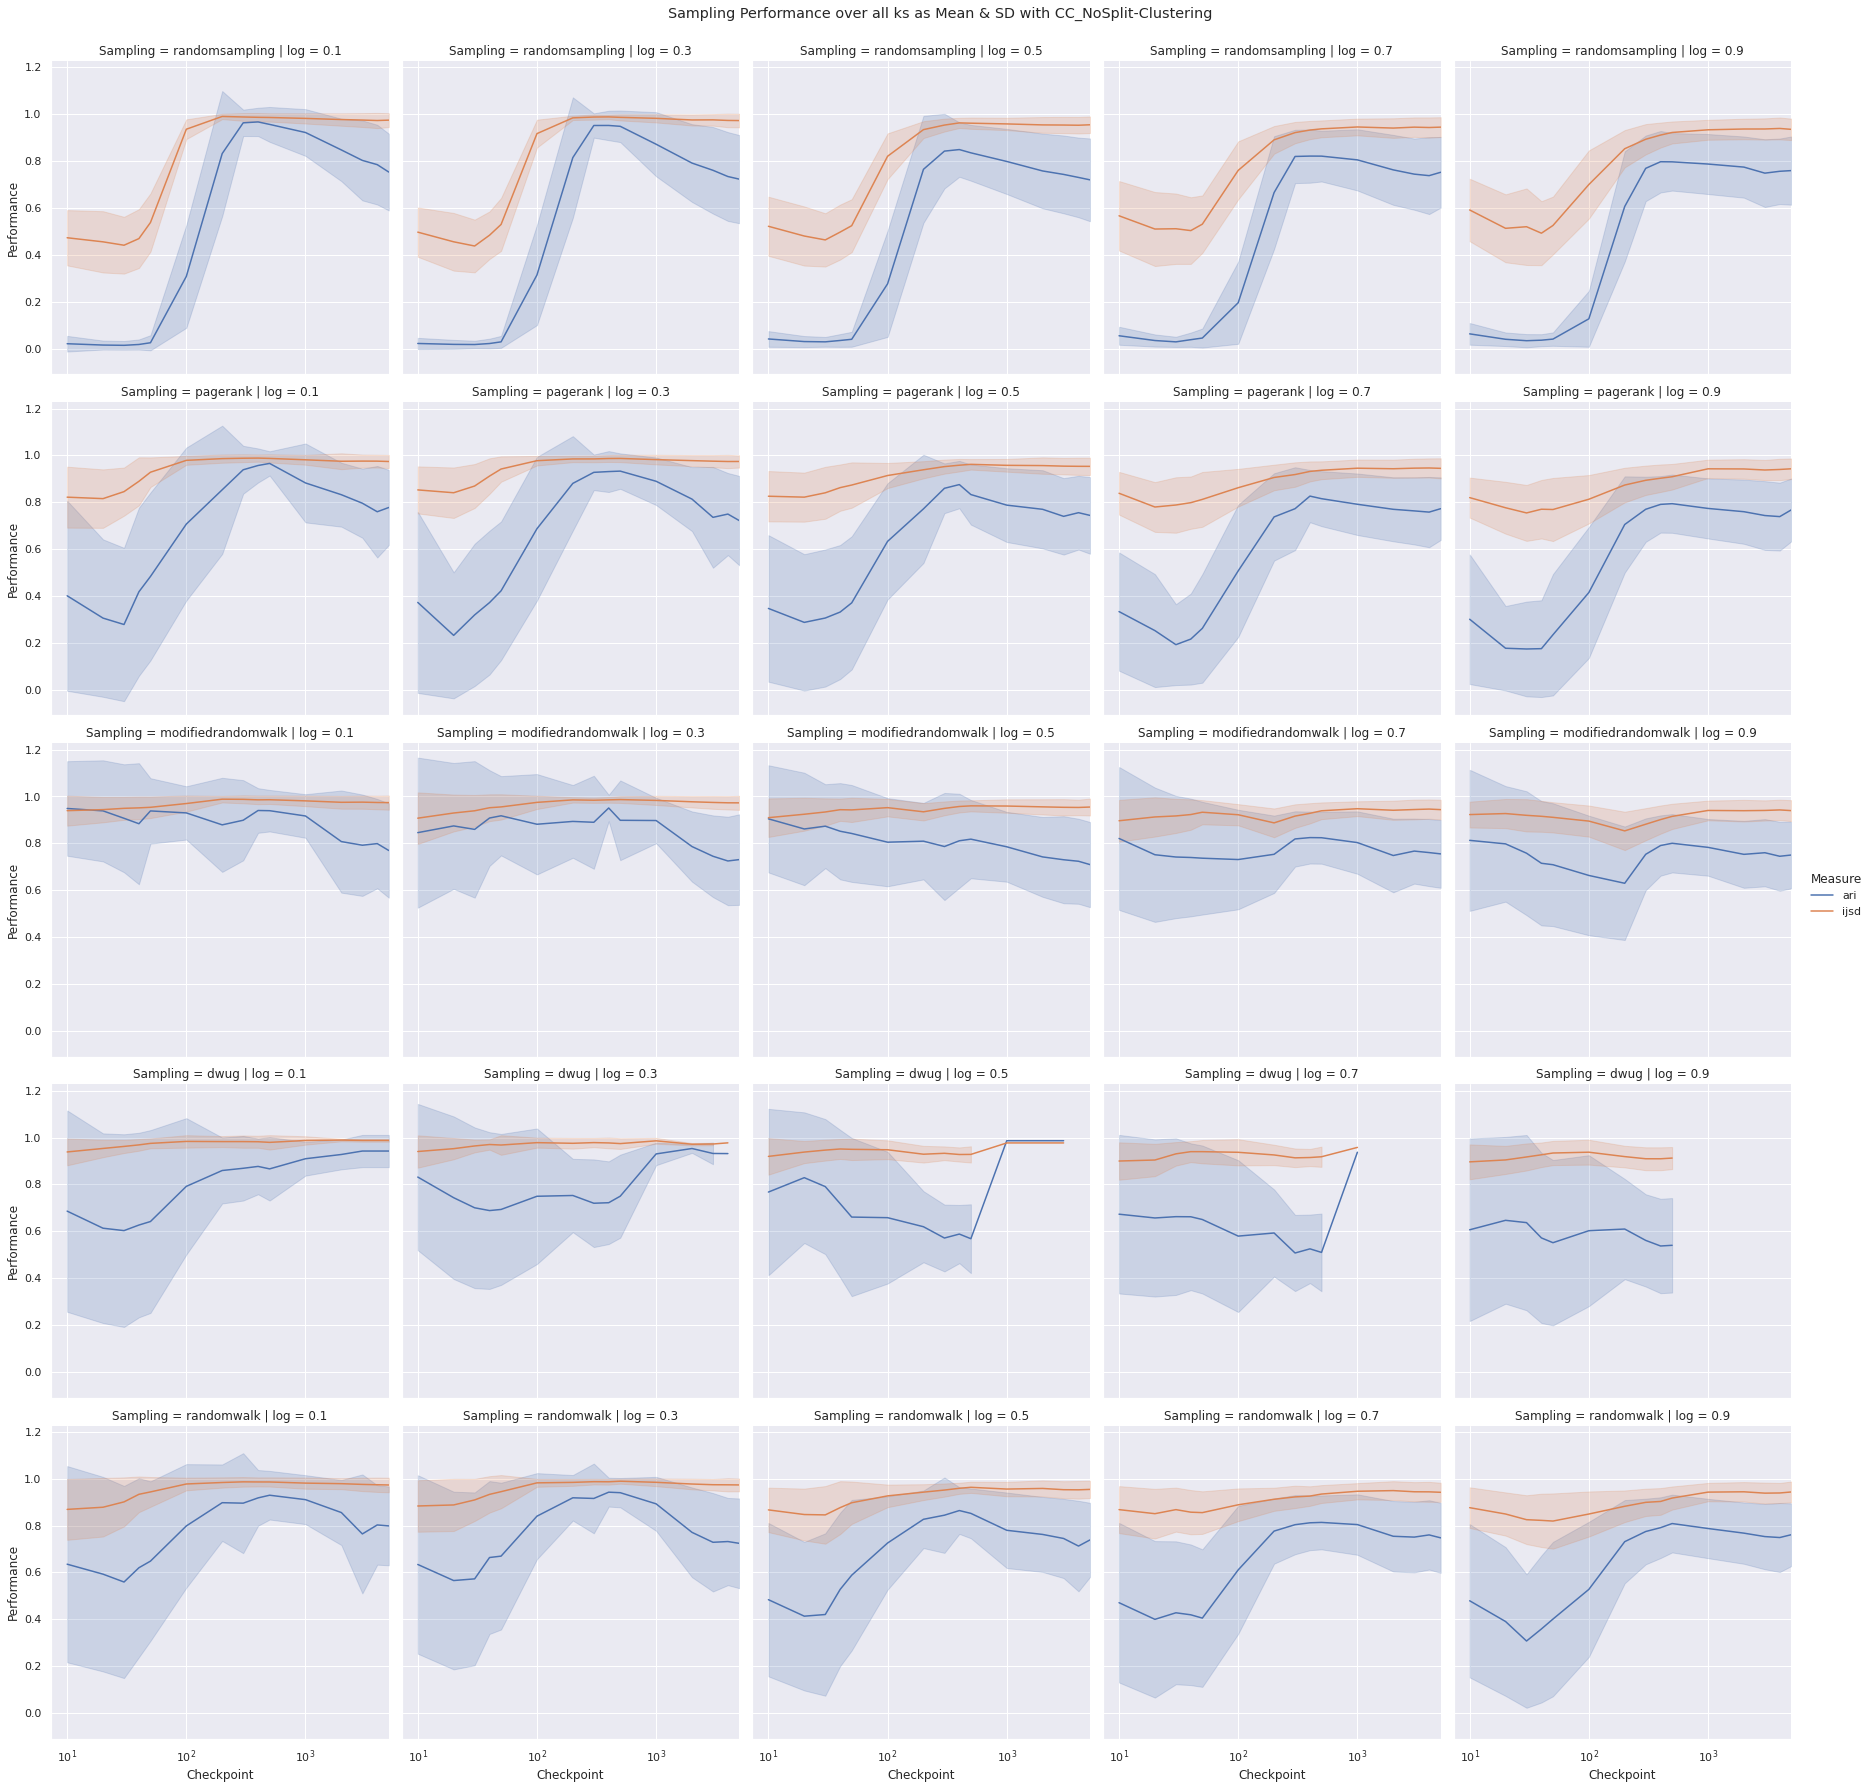

In [26]:
df_sampl = pd.melt(sampling_lm, id_vars=['Checkpoint', 'Sampling', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_sampl,
    x='Checkpoint', y='Performance', hue='Measure', col='log', row='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Sampling Performance over all ks as Mean & SD with CC_NoSplit-Clustering')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])